# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [4]:
df = pd.read_csv('jetson-sample-data.csv')
df.head()

,client_id,order_id,item_name,quantity,price,date
0,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Cosmonaut,1,16.0,2022-01-24
1,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Krombacher,1,8.0,2022-01-24
2,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Ahi Tuna,1,23.0,2022-01-24
3,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Little Gem Salad,1,14.0,2022-01-24
4,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Fire Pie,1,20.0,2022-01-24


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687911 entries, 0 to 687910
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  687911 non-null  object 
 1   order_id   687911 non-null  object 
 2   item_name  687911 non-null  object 
 3   quantity   687911 non-null  int64  
 4   price      687911 non-null  float64
 5   date       687911 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.5+ MB


# Data Exploration

CLIENT ID

In [113]:
df['client_id'].nunique()

66493

ORDER ID

In [114]:
df['order_id'].nunique()

80517

ITEM NAME

In [115]:
df['item_name'].nunique()

2153

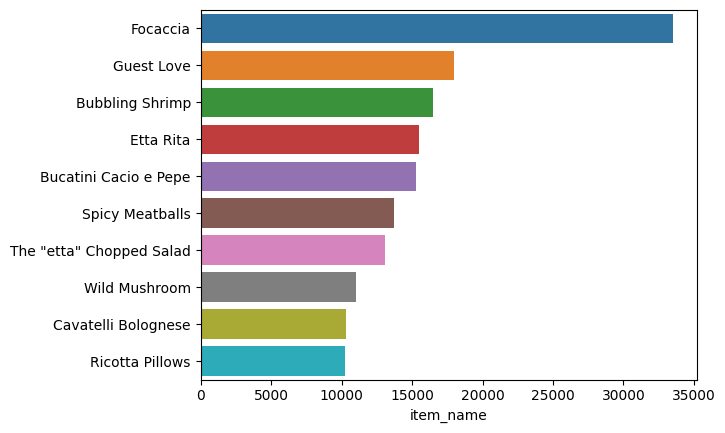

In [116]:
#Plotting top 10 most oredered food
sns.barplot(y=df['item_name'].value_counts()[0:10].index, x=df['item_name'].value_counts()[0:10])
plt.ylabel="Item Name"
plt.xlabel="Total Order"

In [15]:
df[df['item_name']=='The "etta" Chopped Salad']['price']

145       18.0
248       18.0
257       18.0
312       18.0
360       18.0
          ... 
687771    72.0
687793    18.0
687796    18.0
687810    18.0
687812    18.0
Name: price, Length: 13081, dtype: float64

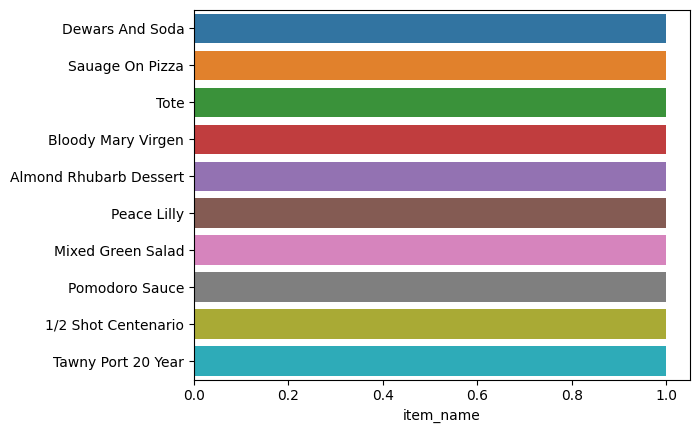

In [117]:
#Plotting top 10 least ordered food
sns.barplot(y=df['item_name'].value_counts()[2143:].index, x=df['item_name'].value_counts()[2143:])
plt.ylabel="Item Name"
plt.xlabel="Total Order"

PRICE

(array([2.00000e+00, 0.00000e+00, 0.00000e+00, 6.86383e+05, 1.42200e+03,
        7.30000e+01, 2.20000e+01, 5.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([-4430. , -3289.5, -2149. , -1008.5,   132. ,  1272.5,  2413. ,
         3553.5,  4694. ,  5834.5,  6975. ]),
 <BarContainer object of 10 artists>)

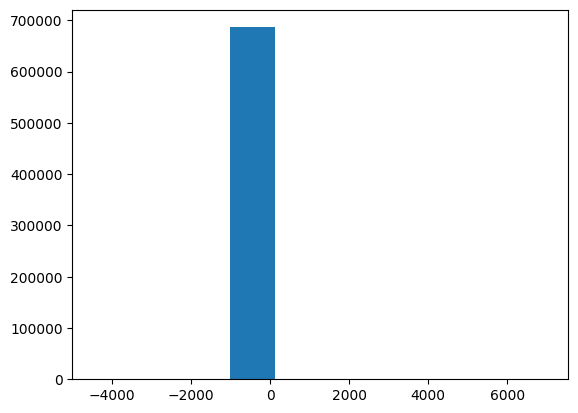

In [118]:
#Plotting price
plt.hist(df['price'], bins=10)

In [119]:
df['price'].describe()

count    687911.000000
mean         17.440815
std          38.704005
min       -4430.000000
25%          12.000000
50%          16.000000
75%          20.000000
max        6975.000000
Name: price, dtype: float64

In [9]:
#Dropping rows where price is negative
df = df[df['price']>=1][['client_id', 'order_id', 'item_name', 'quantity', 'price', 'date']]

In [122]:
#Studying the most priced items
df[df['price']/df['quantity']>=800][df['quantity']>0][['item_name', 'quantity', 'price', 'date']]

C:\Users\sanik\AppData\Local\Temp\ipykernel_24552\3818146123.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['price']/df['quantity']>=800][df['quantity']>0][['item_name', 'quantity', 'price', 'date']]


,item_name,quantity,price,date
113112,Liquor Package,1,1200.0,2023-03-08
134898,Room Fee,1,1744.0,2022-11-05
186692,Room Fee,1,1800.0,2021-08-18
293092,Room Rental,1,3033.1,2022-08-17
323497,Room Rental,1,1547.0,2022-06-15
475022,Open Food,1,2470.0,2021-04-17
521689,Brunch Beverage Package,1,1400.0,2022-07-02
566810,Room Fee,1,908.0,2022-11-12
604485,$45 pp Lunch Menu,1,3600.0,2023-02-23


In [123]:
#Dropping rows with invalid item names
df1 = df[ (df['item_name'].isin(['Room Fee', 'Room Rental']))][['item_name', 'quantity', 'price', 'date']]
df1.head()
df.drop(df1.index, axis=0,inplace=True)

QUANTITY

In [124]:
df['quantity'].describe()

count    665814.000000
mean          1.159794
std           1.371359
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         200.000000
Name: quantity, dtype: float64

In [125]:
#Dropping rows with quantity =0
df = df[df['quantity']>0 ][['client_id', 'order_id', 'item_name', 'quantity', 'price', 'date']] 

In [126]:
#Studying data with high quantity values
df[df['quantity']>=150][['item_name', 'quantity', 'price', 'date']]

,item_name,quantity,price,date
123032,Fire-Baked Focaccia,150,450.0,2022-09-22
123033,Passed Shrimp,150,450.0,2022-09-22
123034,Crispy Chicken Nuggets,150,450.0,2022-09-22
123035,Passed Meatballs,150,450.0,2022-09-22
123036,Truffle Potato Croquette,150,450.0,2022-09-22
201742,Passed Meatballs,200,600.0,2021-10-08
201749,Crispy Chicken Nuggets,150,450.0,2021-10-08


DATE

In [127]:
df['date']=pd.to_datetime(df['date'])
df['day']= df['date'].dt.date
df['month']= df['date'].dt.month
df['year']= df['date'].dt.year

In [128]:
#Data after pre-processing
df.head()

,client_id,order_id,item_name,quantity,price,date,day,month,year
0,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Cosmonaut,1,16.0,2022-01-24,2022-01-24,1,2022
1,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Krombacher,1,8.0,2022-01-24,2022-01-24,1,2022
2,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Ahi Tuna,1,23.0,2022-01-24,2022-01-24,1,2022
3,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Little Gem Salad,1,14.0,2022-01-24,2022-01-24,1,2022
4,ahNzfnNldmVucm9vbXMtc2VjdXJlcicLEhpuaWdodGxvb3...,ahNzfnNldmVucm9vbXMtc2VjdXJlciULEhtuaWdodGxvb3...,Fire Pie,1,20.0,2022-01-24,2022-01-24,1,2022


In [150]:
df.to_csv('data.csv')